**Diabet kasalligini aniqlash:**

Jadvalimiz quyidagi ko'rinishga ega bo'lsin.


| BMI | Qon shakari | Diabet          |
| --- | ----------- | --------------- |
| 22  | 85          | 0 (Sog'lom)     |
| 30  | 110         | 1 (Xavf ostida) |
| 25  | 95          | 0 (Sog'lom)     |
| 33  | 120         | 1 (Xavf ostida) |



BMI - Inson bo'yi va vaznidan kelib chiqadiagn qiymat

Qon shakari - Qand miqdori / Glyukoza


In [2]:
# kutubxonalarni o'rnatamiz

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [6]:
# X va y

X = torch.tensor([[0.2,0.3],
                  [0.6,0.8],
                  [0.4,0.5],
                  [0.7,0.9]],
                  dtype=torch.float32)

# Tenzor bu array (Jamlanma)

y = torch.tensor([[0],[1],[0],[1]],dtype=torch.float32)


In [7]:
# Model

model = nn.Sequential(
    nn.Linear(2,4),
    nn.ReLU(),
    nn.Linear(4,1),
    nn.Sigmoid()
)

In [35]:
loss = nn.BCELoss()
optimizer = optim.SGD(model.parameters(),lr=0.01)

epochs = 100 # 200 marta aylantiramiz, ko'rib chiqadi

losses = []

for epoch in range(epochs):
  y_pred = model(X)
  loss_value = loss(y_pred,y)
  losses.append(loss_value.item())

  optimizer.zero_grad()
  loss_value.backward()
  optimizer.step()

  if epoch % 10 == 0:
    print(f"Epoch: {epoch}, Loss: {loss_value.item()}")


Epoch: 0, Loss: 0.22154051065444946
Epoch: 10, Loss: 0.2199922651052475
Epoch: 20, Loss: 0.21845781803131104
Epoch: 30, Loss: 0.21694499254226685
Epoch: 40, Loss: 0.21543754637241364
Epoch: 50, Loss: 0.21394361555576324
Epoch: 60, Loss: 0.21246305108070374
Epoch: 70, Loss: 0.21099993586540222
Epoch: 80, Loss: 0.20954924821853638
Epoch: 90, Loss: 0.20810800790786743


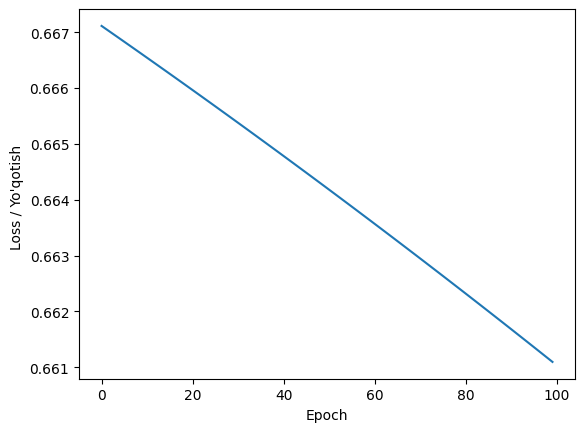

In [19]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss / Yo'qotish ")
plt.show()

Endi yangi bemor kirib keldi:

In [43]:
yangi_bemor_x = torch.tensor([[0.3,0.95]],dtype=torch.float32)
y_pred = model(yangi_bemor_x)
print(y_pred) # 70% ekan diabet bo'lishi

tensor([[0.7031]], grad_fn=<SigmoidBackward0>)
